In [1]:
# Author: Willian M. Braga 
# Análises diárias dos indices de fechamento Ibovespa 


import pandas as pd
import datetime

dataset = pd.read_csv('/home/will/Documentos/SIAD/datasets/ipeadata_ibovespa_fechamento.csv', sep=",")
dataset

,Data,Índice de ações - Ibovespa - fechamento - - - Bolsa de Valores- Mercadorias e Futuros (BM&FBovespa) - GM366_IBVSP366,Estados Unidos - Índice de ações - Dow Jones - fechamento - - - Valor Econômico - GM366_DOW366,Unnamed: 3
0,02/01/1900,NaN,68.13,NaN
1,03/01/1900,NaN,66.61,NaN
2,04/01/1900,NaN,67.15,NaN
3,05/01/1900,NaN,66.71,NaN
4,06/01/1900,NaN,66.02,NaN
...,...,...,...,...
44018,09/07/2020,99160.0,25706.09,NaN
44019,10/07/2020,100032.0,26075.30,NaN
44020,11/07/2020,NaN,NaN,NaN
44021,12/07/2020,NaN,NaN,NaN


In [2]:
# Preparação dos dados
dataset.columns = ['data_fato','indice_ibovespa','indice_dow_jones', '?']  
dataset.drop('?', inplace=True, axis=1)  
dataset = dataset.dropna()
dataset

,data_fato,indice_ibovespa,indice_dow_jones
34517,05/07/1994,3564.3,3652.479645
34518,06/07/1994,3753.5,3674.494236
34519,07/07/1994,3904.9,3688.415227
34520,08/07/1994,4051.9,3709.134842
34523,11/07/1994,4010.8,3702.983707
...,...,...,...
44016,07/07/2020,97761.0,25890.180000
44017,08/07/2020,99770.0,26067.280000
44018,09/07/2020,99160.0,25706.090000
44019,10/07/2020,100032.0,26075.300000


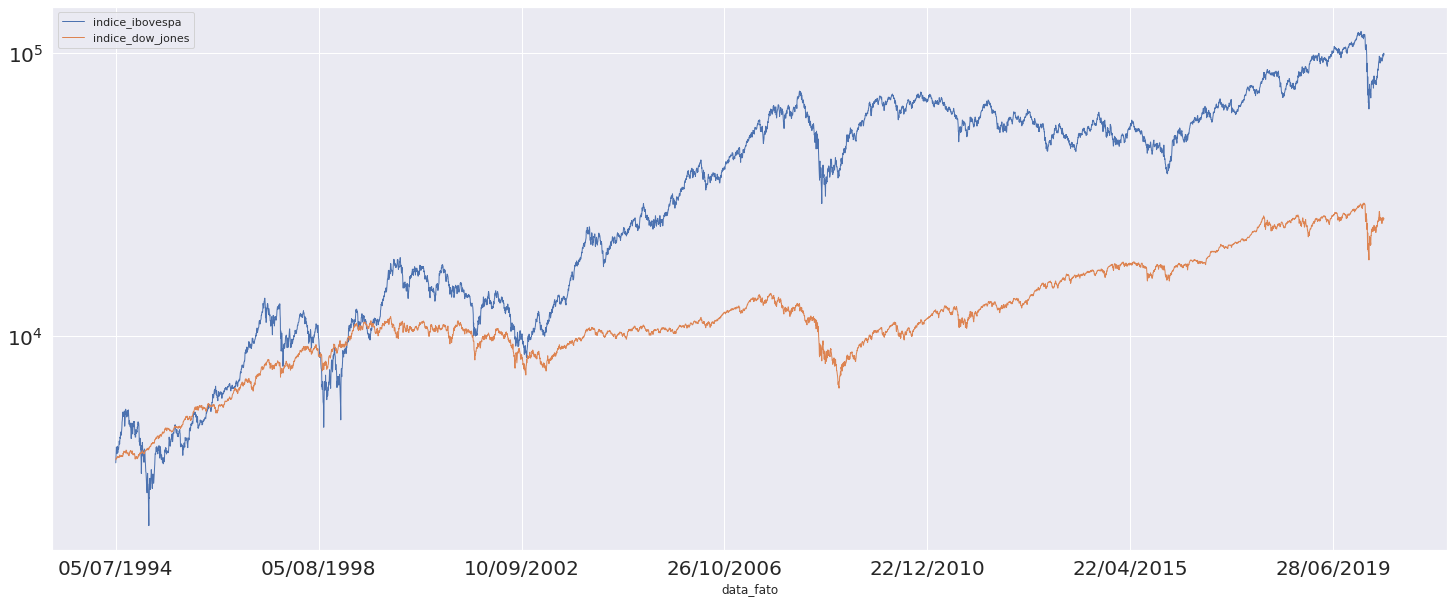

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
dataset.set_index('data_fato').plot(y=['indice_ibovespa', 'indice_dow_jones'] ,fontsize=20,linewidth=1 , logy=True)

In [4]:
# Restringir periodo entre 02/01/2010 - 02/01/2020
dataset['data_fato'] = pd.to_datetime(dataset['data_fato'], format='%d/%m/%Y')
periodo = (dataset['data_fato']>'01/02/2010') & (dataset['data_fato'] < '01/03/2020')
dataset_2 = dataset[periodo].copy()
dataset_2

/home/will/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_fato,indice_ibovespa,indice_dow_jones
40179,2010-01-04,70045.0,10584.00
40180,2010-01-05,70239.0,10572.00
40181,2010-01-06,70729.0,10573.70
40182,2010-01-07,70451.0,10606.90
40183,2010-01-08,70262.0,10618.20
...,...,...,...
43819,2019-12-23,115863.0,28551.53
43822,2019-12-26,117203.0,28621.39
43823,2019-12-27,116534.0,28645.26
43826,2019-12-30,115964.0,28462.14


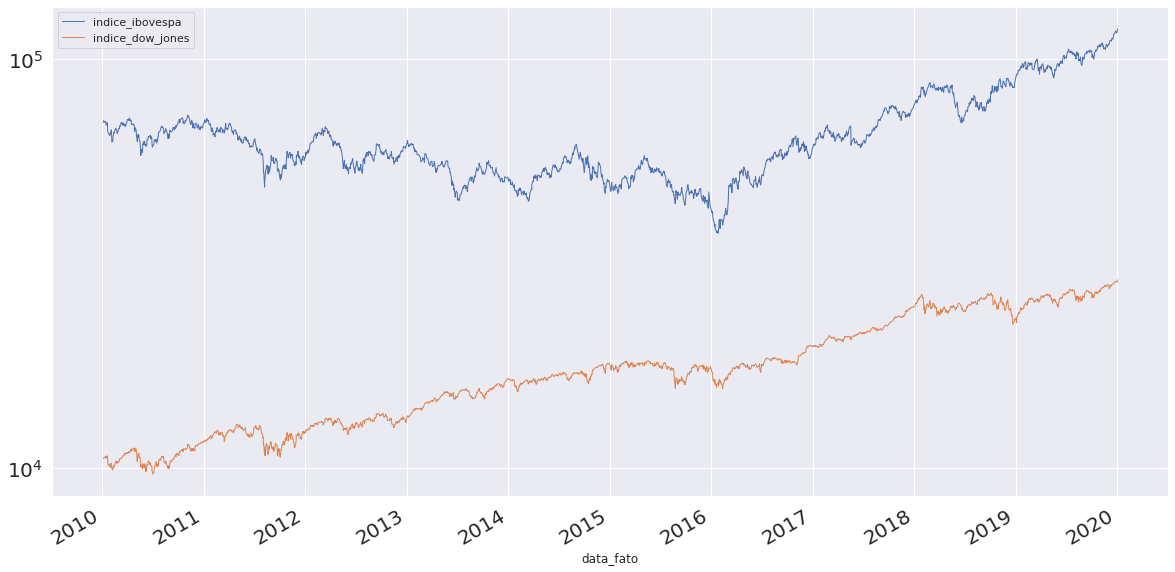

In [5]:
sns.set(rc={'figure.figsize':(20,10)})
dataset_2.set_index('data_fato').sort_index().plot(y=['indice_ibovespa', 'indice_dow_jones'],logy=True ,fontsize=20,linewidth=1)

In [6]:
dataset_2.corr(method='pearson').style.background_gradient()
# Com base na correlação podemos concluir que...

,indice_ibovespa,indice_dow_jones
indice_ibovespa,1.000000,0.657795
indice_dow_jones,0.657795,1.000000


In [7]:
dataset_2.set_index('data_fato').sort_index()

,indice_ibovespa,indice_dow_jones
data_fato,,
2010-01-04,70045.0,10584.00
2010-01-05,70239.0,10572.00
2010-01-06,70729.0,10573.70
2010-01-07,70451.0,10606.90
2010-01-08,70262.0,10618.20
...,...,...
2019-12-23,115863.0,28551.53
2019-12-26,117203.0,28621.39
2019-12-27,116534.0,28645.26


In [8]:
from sklearn.preprocessing import StandardScaler

ibovespa_norm = dataset_2["indice_ibovespa"].values.copy()
ibovespa_norm.shape = (len(ibovespa_norm), 1)

scaler = StandardScaler()
ibovespa_norm = scaler.fit_transform(ibovespa_norm)
dataset_2["indice_ibovespa_norm"] = ibovespa_norm

dow_jones_norm = dataset_2["indice_dow_jones"].values.copy()
dow_jones_norm.shape = (len(dow_jones_norm), 1)

scaler = StandardScaler()
dow_jones_norm = scaler.fit_transform(dow_jones_norm)
dataset_2["indice_dj_norm"] = dow_jones_norm
dataset_2.head(10)

,data_fato,indice_ibovespa,indice_dow_jones,indice_ibovespa_norm,indice_dj_norm
40179,2010-01-04,70045.0,10584.0,0.314502,-1.357235
40180,2010-01-05,70239.0,10572.0,0.326730,-1.359548
40181,2010-01-06,70729.0,10573.7,0.357615,-1.359220
40182,2010-01-07,70451.0,10606.9,0.340093,-1.352821
40183,2010-01-08,70262.0,10618.2,0.328180,-1.350643
40186,2010-01-11,70433.0,10664.0,0.338958,-1.341815
40187,2010-01-12,70076.0,10627.0,0.316456,-1.348947
40188,2010-01-13,70385.0,10681.0,0.335933,-1.338538
40189,2010-01-14,69801.0,10711.0,0.299122,-1.332756
40190,2010-01-15,68978.0,10610.0,0.247247,-1.352223


In [9]:
df_ibovespa = pd.DataFrame()
window_size = 17
for i in range(0, window_size + 1):
    df_ibovespa["E{}".format(i)] = dataset_2["indice_ibovespa_norm"].shift(-i)
df_ibovespa = df_ibovespa.iloc[:-window_size]
df_ibovespa

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17
40179,0.314502,0.326730,0.357615,0.340093,0.328180,0.338958,0.316456,0.335933,0.299122,0.247247,0.273909,0.305930,0.198208,0.076558,0.073406,0.029536,0.000920,0.033570
40180,0.326730,0.357615,0.340093,0.328180,0.338958,0.316456,0.335933,0.299122,0.247247,0.273909,0.305930,0.198208,0.076558,0.073406,0.029536,0.000920,0.033570,0.021846
40181,0.357615,0.340093,0.328180,0.338958,0.316456,0.335933,0.299122,0.247247,0.273909,0.305930,0.198208,0.076558,0.073406,0.029536,0.000920,0.033570,0.021846,0.095593
40182,0.340093,0.328180,0.338958,0.316456,0.335933,0.299122,0.247247,0.273909,0.305930,0.198208,0.076558,0.073406,0.029536,0.000920,0.033570,0.021846,0.095593,0.132845
40183,0.328180,0.338958,0.316456,0.335933,0.299122,0.247247,0.273909,0.305930,0.198208,0.076558,0.073406,0.029536,0.000920,0.033570,0.021846,0.095593,0.132845,0.129441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43793,2.688461,2.709514,2.773743,2.770213,2.851902,2.872135,2.903903,2.894511,2.875287,2.893692,2.971599,2.994606,2.952437,2.997820,3.104911,3.156345,3.155714,3.202484
43795,2.709514,2.773743,2.770213,2.851902,2.872135,2.903903,2.894511,2.875287,2.893692,2.971599,2.994606,2.952437,2.997820,3.104911,3.156345,3.155714,3.202484,3.286946
43798,2.773743,2.770213,2.851902,2.872135,2.903903,2.894511,2.875287,2.893692,2.971599,2.994606,2.952437,2.997820,3.104911,3.156345,3.155714,3.202484,3.286946,3.244778
43799,2.770213,2.851902,2.872135,2.903903,2.894511,2.875287,2.893692,2.971599,2.994606,2.952437,2.997820,3.104911,3.156345,3.155714,3.202484,3.286946,3.244778,3.208850


In [10]:
arr = df_ibovespa.values
arr

array([[3.14501807e-01, 3.26729938e-01, 3.57615424e-01, ...,
        2.95359290e-02, 9.19581167e-04, 3.35699516e-02],
       [3.26729938e-01, 3.57615424e-01, 3.40092638e-01, ...,
        9.19581167e-04, 3.35699516e-02, 2.18460734e-02],
       [3.57615424e-01, 3.40092638e-01, 3.28179665e-01, ...,
        3.35699516e-02, 2.18460734e-02, 9.55930492e-02],
       ...,
       [2.77374284e+00, 2.77021307e+00, 2.85190203e+00, ...,
        3.20248380e+00, 3.28694615e+00, 3.24477801e+00],
       [2.77021307e+00, 2.85190203e+00, 2.87213517e+00, ...,
        3.28694615e+00, 3.24477801e+00, 3.20884999e+00],
       [2.85190203e+00, 2.87213517e+00, 2.90390310e+00, ...,
        3.24477801e+00, 3.20884999e+00, 3.37329945e+00]])

In [11]:
X = arr[:, :-1]
target = arr[:, -1]
print(X)
print(target)

[[3.14501807e-01 3.26729938e-01 3.57615424e-01 ... 7.34059248e-02
  2.95359290e-02 9.19581167e-04]
 [3.26729938e-01 3.57615424e-01 3.40092638e-01 ... 2.95359290e-02
  9.19581167e-04 3.35699516e-02]
 [3.57615424e-01 3.40092638e-01 3.28179665e-01 ... 9.19581167e-04
  3.35699516e-02 2.18460734e-02]
 ...
 [2.77374284e+00 2.77021307e+00 2.85190203e+00 ... 3.15571435e+00
  3.20248380e+00 3.28694615e+00]
 [2.77021307e+00 2.85190203e+00 2.87213517e+00 ... 3.20248380e+00
  3.28694615e+00 3.24477801e+00]
 [2.85190203e+00 2.87213517e+00 2.90390310e+00 ... 3.28694615e+00
  3.24477801e+00 3.20884999e+00]]
[0.03356995 0.02184607 0.09559305 ... 3.24477801 3.20884999 3.37329945]


In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

mlp = MLPRegressor(hidden_layer_sizes=(50,100), activation="logistic", max_iter=1000, solver="sgd", verbose=True)
full_predict = cross_val_predict(mlp, X, target, cv=10)
print("Mean Squared Error: %s" %(metrics.mean_squared_error(target, full_predict)))

Iteration 1, loss = 0.79822981
Iteration 2, loss = 0.59606875
Iteration 3, loss = 0.57743266
Iteration 4, loss = 0.56186778
Iteration 5, loss = 0.55538332
Iteration 6, loss = 0.54997487
Iteration 7, loss = 0.54395206
Iteration 8, loss = 0.53831700
Iteration 9, loss = 0.53285678
Iteration 10, loss = 0.52696590
Iteration 11, loss = 0.52106308
Iteration 12, loss = 0.51532203
Iteration 13, loss = 0.50927226
Iteration 14, loss = 0.50314832
Iteration 15, loss = 0.49707893
Iteration 16, loss = 0.49078920
Iteration 17, loss = 0.48422117
Iteration 18, loss = 0.47746067
Iteration 19, loss = 0.47062955
Iteration 20, loss = 0.46347776
Iteration 21, loss = 0.45618013
Iteration 22, loss = 0.44860378
Iteration 23, loss = 0.44054337
Iteration 24, loss = 0.43229001
Iteration 25, loss = 0.42395981
Iteration 26, loss = 0.41517383
Iteration 27, loss = 0.40580064
Iteration 28, loss = 0.39625277
Iteration 29, loss = 0.38638090
Iteration 30, loss = 0.37609822
Iteration 31, loss = 0.36565085
Iteration 32, los

Iteration 56, loss = 0.11867321
Iteration 57, loss = 0.10973907
Iteration 58, loss = 0.10083134
Iteration 59, loss = 0.09258601
Iteration 60, loss = 0.08526461
Iteration 61, loss = 0.07793806
Iteration 62, loss = 0.07159541
Iteration 63, loss = 0.06559604
Iteration 64, loss = 0.06029684
Iteration 65, loss = 0.05543087
Iteration 66, loss = 0.05102715
Iteration 67, loss = 0.04712835
Iteration 68, loss = 0.04360023
Iteration 69, loss = 0.04048469
Iteration 70, loss = 0.03777736
Iteration 71, loss = 0.03540391
Iteration 72, loss = 0.03324036
Iteration 73, loss = 0.03140352
Iteration 74, loss = 0.02980405
Iteration 75, loss = 0.02842705
Iteration 76, loss = 0.02722869
Iteration 77, loss = 0.02618767
Iteration 78, loss = 0.02531206
Iteration 79, loss = 0.02455496
Iteration 80, loss = 0.02390113
Iteration 81, loss = 0.02333981
Iteration 82, loss = 0.02284195
Iteration 83, loss = 0.02247546
Iteration 84, loss = 0.02211576
Iteration 85, loss = 0.02177203
Iteration 86, loss = 0.02150861
Iteratio

Iteration 99, loss = 0.02005572
Iteration 100, loss = 0.01999792
Iteration 101, loss = 0.01993429
Iteration 102, loss = 0.01987852
Iteration 103, loss = 0.01981890
Iteration 104, loss = 0.01979166
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49588912
Iteration 2, loss = 0.48976079
Iteration 3, loss = 0.48681022
Iteration 4, loss = 0.48357952
Iteration 5, loss = 0.48067247
Iteration 6, loss = 0.47735020
Iteration 7, loss = 0.47344719
Iteration 8, loss = 0.47023316
Iteration 9, loss = 0.46684517
Iteration 10, loss = 0.46374355
Iteration 11, loss = 0.46001215
Iteration 12, loss = 0.45620030
Iteration 13, loss = 0.45267734
Iteration 14, loss = 0.44882070
Iteration 15, loss = 0.44509973
Iteration 16, loss = 0.44126976
Iteration 17, loss = 0.43721090
Iteration 18, loss = 0.43306113
Iteration 19, loss = 0.42819051
Iteration 20, loss = 0.42398649
Iteration 21, loss = 0.41922468
Iteration 22, loss = 0.41443449
Iteration 23, loss

Iteration 27, loss = 0.42255988
Iteration 28, loss = 0.41478645
Iteration 29, loss = 0.40721330
Iteration 30, loss = 0.39931722
Iteration 31, loss = 0.39118912
Iteration 32, loss = 0.38271771
Iteration 33, loss = 0.37368845
Iteration 34, loss = 0.36426622
Iteration 35, loss = 0.35491854
Iteration 36, loss = 0.34493390
Iteration 37, loss = 0.33488952
Iteration 38, loss = 0.32433701
Iteration 39, loss = 0.31379722
Iteration 40, loss = 0.30253890
Iteration 41, loss = 0.29142164
Iteration 42, loss = 0.27990799
Iteration 43, loss = 0.26833966
Iteration 44, loss = 0.25686708
Iteration 45, loss = 0.24473238
Iteration 46, loss = 0.23273368
Iteration 47, loss = 0.22086052
Iteration 48, loss = 0.20909592
Iteration 49, loss = 0.19739436
Iteration 50, loss = 0.18563449
Iteration 51, loss = 0.17411485
Iteration 52, loss = 0.16311504
Iteration 53, loss = 0.15229597
Iteration 54, loss = 0.14191825
Iteration 55, loss = 0.13172036
Iteration 56, loss = 0.12197251
Iteration 57, loss = 0.11306894
Iteratio

Iteration 64, loss = 0.16117924
Iteration 65, loss = 0.15911389
Iteration 66, loss = 0.15710856
Iteration 67, loss = 0.15495633
Iteration 68, loss = 0.15290940
Iteration 69, loss = 0.15083653
Iteration 70, loss = 0.14847780
Iteration 71, loss = 0.14627281
Iteration 72, loss = 0.14401059
Iteration 73, loss = 0.14164321
Iteration 74, loss = 0.13937904
Iteration 75, loss = 0.13696734
Iteration 76, loss = 0.13463278
Iteration 77, loss = 0.13223412
Iteration 78, loss = 0.12985122
Iteration 79, loss = 0.12727252
Iteration 80, loss = 0.12476456
Iteration 81, loss = 0.12222370
Iteration 82, loss = 0.11965221
Iteration 83, loss = 0.11710911
Iteration 84, loss = 0.11447958
Iteration 85, loss = 0.11192867
Iteration 86, loss = 0.10937339
Iteration 87, loss = 0.10674675
Iteration 88, loss = 0.10405557
Iteration 89, loss = 0.10140110
Iteration 90, loss = 0.09882459
Iteration 91, loss = 0.09627693
Iteration 92, loss = 0.09367488
Iteration 93, loss = 0.09089827
Iteration 94, loss = 0.08832540
Iteratio

In [13]:
print(len(full_predict))
print(len(dataset_2["indice_ibovespa_norm"]))

2344
2361


In [14]:
import numpy as np

values_to_add = list()
for i in range(0, window_size):
    values_to_add.append(float("NaN"))
full_predict = np.insert(full_predict, 0, values_to_add)
full_predict.shape = (len(full_predict), 1)
full_predict.shape

(2361, 1)

In [15]:
dataset_2["predict_ibovespa"] = full_predict
dataset_2

,data_fato,indice_ibovespa,indice_dow_jones,indice_ibovespa_norm,indice_dj_norm,predict_ibovespa
40179,2010-01-04,70045.0,10584.00,0.314502,-1.357235,NaN
40180,2010-01-05,70239.0,10572.00,0.326730,-1.359548,NaN
40181,2010-01-06,70729.0,10573.70,0.357615,-1.359220,NaN
40182,2010-01-07,70451.0,10606.90,0.340093,-1.352821,NaN
40183,2010-01-08,70262.0,10618.20,0.328180,-1.350643,NaN
...,...,...,...,...,...,...
43819,2019-12-23,115863.0,28551.53,3.202484,2.105958,1.739099
43822,2019-12-26,117203.0,28621.39,3.286946,2.119424,1.743758
43823,2019-12-27,116534.0,28645.26,3.244778,2.124024,1.749321
43826,2019-12-30,115964.0,28462.14,3.208850,2.088729,1.753542


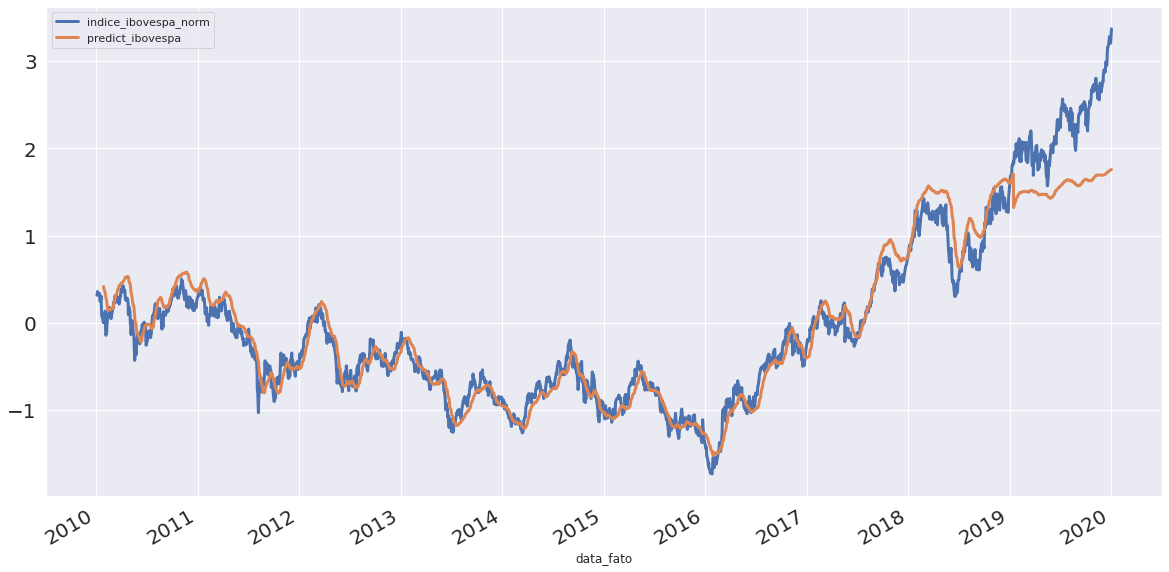

In [16]:
dataset_2.set_index('data_fato').plot(y=["indice_ibovespa_norm", "predict_ibovespa"] ,fontsize=20,linewidth=3)

In [17]:
# Indice Dow Jones
df_jones = pd.DataFrame()
window_size = 17
for i in range(0, window_size + 1):
    df_jones["E{}".format(i)] = dataset_2["indice_dj_norm"].shift(-i)
df_jones = df_jones.iloc[:-window_size]
df_jones

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17
40179,-1.357235,-1.359548,-1.359220,-1.352821,-1.350643,-1.341815,-1.348947,-1.338538,-1.332756,-1.352223,-1.352223,-1.330057,-1.353573,-1.394628,-1.436454,-1.432406,-1.424311,-1.446670
40180,-1.359548,-1.359220,-1.352821,-1.350643,-1.341815,-1.348947,-1.338538,-1.332756,-1.352223,-1.352223,-1.330057,-1.353573,-1.394628,-1.436454,-1.432406,-1.424311,-1.446670,-1.456885
40181,-1.359220,-1.352821,-1.350643,-1.341815,-1.348947,-1.338538,-1.332756,-1.352223,-1.352223,-1.330057,-1.353573,-1.394628,-1.436454,-1.432406,-1.424311,-1.446670,-1.456885,-1.433948
40182,-1.352821,-1.350643,-1.341815,-1.348947,-1.338538,-1.332756,-1.352223,-1.352223,-1.330057,-1.353573,-1.394628,-1.436454,-1.432406,-1.424311,-1.446670,-1.456885,-1.433948,-1.412553
40183,-1.350643,-1.341815,-1.348947,-1.338538,-1.332756,-1.352223,-1.352223,-1.330057,-1.353573,-1.394628,-1.436454,-1.432406,-1.424311,-1.446670,-1.456885,-1.433948,-1.412553,-1.417565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43793,2.031263,2.009561,1.957834,1.903820,1.932148,1.937547,2.002555,1.982228,1.976854,1.982556,2.025105,2.025746,2.045120,2.051147,2.045773,2.072310,2.087370,2.105958
43795,2.009561,1.957834,1.903820,1.932148,1.937547,2.002555,1.982228,1.976854,1.982556,2.025105,2.025746,2.045120,2.051147,2.045773,2.072310,2.087370,2.105958,2.119424
43798,1.957834,1.903820,1.932148,1.937547,2.002555,1.982228,1.976854,1.982556,2.025105,2.025746,2.045120,2.051147,2.045773,2.072310,2.087370,2.105958,2.119424,2.124024
43799,1.903820,1.932148,1.937547,2.002555,1.982228,1.976854,1.982556,2.025105,2.025746,2.045120,2.051147,2.045773,2.072310,2.087370,2.105958,2.119424,2.124024,2.088729


In [18]:
arr_dj = df_jones.values
arr_dj

array([[-1.35723485, -1.35954782, -1.35922015, ..., -1.4324063 ,
        -1.42431091, -1.4466696 ],
       [-1.35954782, -1.35922015, -1.35282094, ..., -1.42431091,
        -1.4466696 , -1.45688521],
       [-1.35922015, -1.35282094, -1.35064289, ..., -1.4466696 ,
        -1.45688521, -1.43394828],
       ...,
       [ 1.9578339 ,  1.90382032,  1.93214839, ...,  2.10595828,
         2.11942361,  2.12402449],
       [ 1.90382032,  1.93214839,  1.93754724, ...,  2.11942361,
         2.12402449,  2.0887286 ],
       [ 1.93214839,  1.93754724,  2.00255513, ...,  2.12402449,
         2.0887286 ,  2.16711122]])

In [19]:
X_dj = arr_dj[:, :-1]
target_dj = arr_dj[:, -1]
print(X_dj)
print(target_dj)

[[-1.35723485 -1.35954782 -1.35922015 ... -1.43645399 -1.4324063
  -1.42431091]
 [-1.35954782 -1.35922015 -1.35282094 ... -1.4324063  -1.42431091
  -1.4466696 ]
 [-1.35922015 -1.35282094 -1.35064289 ... -1.42431091 -1.4466696
  -1.45688521]
 ...
 [ 1.9578339   1.90382032  1.93214839 ...  2.08736973  2.10595828
   2.11942361]
 [ 1.90382032  1.93214839  1.93754724 ...  2.10595828  2.11942361
   2.12402449]
 [ 1.93214839  1.93754724  2.00255513 ...  2.11942361  2.12402449
   2.0887286 ]]
[-1.4466696  -1.45688521 -1.43394828 ...  2.12402449  2.0887286
  2.16711122]


In [20]:
mlp = MLPRegressor(hidden_layer_sizes=(50,100), activation="logistic", max_iter=1000, solver="sgd", verbose=True)
full_predict_dj = cross_val_predict(mlp, X_dj, target_dj, cv=10)
print("Mean Squared Error: %s" %(metrics.mean_squared_error(target_dj, full_predict_dj)))

Iteration 1, loss = 0.64868935
Iteration 2, loss = 0.45880104
Iteration 3, loss = 0.44100197
Iteration 4, loss = 0.43375004
Iteration 5, loss = 0.42824482
Iteration 6, loss = 0.42470657
Iteration 7, loss = 0.42144036
Iteration 8, loss = 0.41841960
Iteration 9, loss = 0.41519069
Iteration 10, loss = 0.41213050
Iteration 11, loss = 0.40876668
Iteration 12, loss = 0.40550685
Iteration 13, loss = 0.40202521
Iteration 14, loss = 0.39853119
Iteration 15, loss = 0.39502962
Iteration 16, loss = 0.39141218
Iteration 17, loss = 0.38785434
Iteration 18, loss = 0.38384442
Iteration 19, loss = 0.37988780
Iteration 20, loss = 0.37583276
Iteration 21, loss = 0.37170761
Iteration 22, loss = 0.36717974
Iteration 23, loss = 0.36273517
Iteration 24, loss = 0.35801868
Iteration 25, loss = 0.35349361
Iteration 26, loss = 0.34833227
Iteration 27, loss = 0.34314166
Iteration 28, loss = 0.33788300
Iteration 29, loss = 0.33226906
Iteration 30, loss = 0.32684192
Iteration 31, loss = 0.32066659
Iteration 32, los

Iteration 45, loss = 0.21353766
Iteration 46, loss = 0.20211210
Iteration 47, loss = 0.19075347
Iteration 48, loss = 0.17956566
Iteration 49, loss = 0.16832585
Iteration 50, loss = 0.15725209
Iteration 51, loss = 0.14659624
Iteration 52, loss = 0.13588088
Iteration 53, loss = 0.12572949
Iteration 54, loss = 0.11568260
Iteration 55, loss = 0.10615313
Iteration 56, loss = 0.09711834
Iteration 57, loss = 0.08870418
Iteration 58, loss = 0.08031540
Iteration 59, loss = 0.07268850
Iteration 60, loss = 0.06563275
Iteration 61, loss = 0.05903518
Iteration 62, loss = 0.05297712
Iteration 63, loss = 0.04742221
Iteration 64, loss = 0.04226017
Iteration 65, loss = 0.03768145
Iteration 66, loss = 0.03358487
Iteration 67, loss = 0.02977451
Iteration 68, loss = 0.02649872
Iteration 69, loss = 0.02349669
Iteration 70, loss = 0.02092985
Iteration 71, loss = 0.01864436
Iteration 72, loss = 0.01664762
Iteration 73, loss = 0.01490122
Iteration 74, loss = 0.01343485
Iteration 75, loss = 0.01212017
Iteratio

Iteration 4, loss = 0.56222570
Iteration 5, loss = 0.55753417
Iteration 6, loss = 0.55365669
Iteration 7, loss = 0.54994841
Iteration 8, loss = 0.54658341
Iteration 9, loss = 0.54178678
Iteration 10, loss = 0.53805013
Iteration 11, loss = 0.53421309
Iteration 12, loss = 0.53025725
Iteration 13, loss = 0.52617399
Iteration 14, loss = 0.52211725
Iteration 15, loss = 0.51799886
Iteration 16, loss = 0.51395249
Iteration 17, loss = 0.50938089
Iteration 18, loss = 0.50488888
Iteration 19, loss = 0.50008229
Iteration 20, loss = 0.49582673
Iteration 21, loss = 0.49046575
Iteration 22, loss = 0.48521129
Iteration 23, loss = 0.47963050
Iteration 24, loss = 0.47408548
Iteration 25, loss = 0.46824245
Iteration 26, loss = 0.46259013
Iteration 27, loss = 0.45532322
Iteration 28, loss = 0.44859663
Iteration 29, loss = 0.44146158
Iteration 30, loss = 0.43419888
Iteration 31, loss = 0.42616860
Iteration 32, loss = 0.41802970
Iteration 33, loss = 0.40966159
Iteration 34, loss = 0.40054236
Iteration 35, 

Iteration 69, loss = 0.02782499
Iteration 70, loss = 0.02475535
Iteration 71, loss = 0.02203866
Iteration 72, loss = 0.01961498
Iteration 73, loss = 0.01753025
Iteration 74, loss = 0.01568840
Iteration 75, loss = 0.01407159
Iteration 76, loss = 0.01268777
Iteration 77, loss = 0.01147890
Iteration 78, loss = 0.01045452
Iteration 79, loss = 0.00957580
Iteration 80, loss = 0.00881737
Iteration 81, loss = 0.00818190
Iteration 82, loss = 0.00763341
Iteration 83, loss = 0.00715749
Iteration 84, loss = 0.00676538
Iteration 85, loss = 0.00642405
Iteration 86, loss = 0.00613978
Iteration 87, loss = 0.00590343
Iteration 88, loss = 0.00570206
Iteration 89, loss = 0.00552497
Iteration 90, loss = 0.00538580
Iteration 91, loss = 0.00526282
Iteration 92, loss = 0.00516303
Iteration 93, loss = 0.00507802
Iteration 94, loss = 0.00500838
Iteration 95, loss = 0.00495213
Iteration 96, loss = 0.00489731
Iteration 97, loss = 0.00485552
Iteration 98, loss = 0.00482461
Iteration 99, loss = 0.00479062
Iteratio

Iteration 107, loss = 0.00407653
Iteration 108, loss = 0.00398318
Iteration 109, loss = 0.00389409
Iteration 110, loss = 0.00382246
Iteration 111, loss = 0.00376040
Iteration 112, loss = 0.00370555
Iteration 113, loss = 0.00365459
Iteration 114, loss = 0.00361646
Iteration 115, loss = 0.00357954
Iteration 116, loss = 0.00354719
Iteration 117, loss = 0.00352307
Iteration 118, loss = 0.00349675
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Mean Squared Error: 0.013643731953502552


In [21]:
print(len(full_predict_dj))
print(len(dataset_2["indice_dj_norm"]))

2344
2361


In [22]:
values_to_add_dj = list()
for i in range(0, window_size):
    values_to_add_dj.append(float("NaN"))
full_predict_dj = np.insert(full_predict_dj, 0, values_to_add_dj)
full_predict_dj.shape = (len(full_predict_dj), 1)
full_predict_dj.shape

(2361, 1)

In [23]:
dataset_2["predict_dj"] = full_predict_dj
dataset_2

,data_fato,indice_ibovespa,indice_dow_jones,indice_ibovespa_norm,indice_dj_norm,predict_ibovespa,predict_dj
40179,2010-01-04,70045.0,10584.00,0.314502,-1.357235,NaN,NaN
40180,2010-01-05,70239.0,10572.00,0.326730,-1.359548,NaN,NaN
40181,2010-01-06,70729.0,10573.70,0.357615,-1.359220,NaN,NaN
40182,2010-01-07,70451.0,10606.90,0.340093,-1.352821,NaN,NaN
40183,2010-01-08,70262.0,10618.20,0.328180,-1.350643,NaN,NaN
...,...,...,...,...,...,...,...
43819,2019-12-23,115863.0,28551.53,3.202484,2.105958,1.739099,1.618811
43822,2019-12-26,117203.0,28621.39,3.286946,2.119424,1.743758,1.619839
43823,2019-12-27,116534.0,28645.26,3.244778,2.124024,1.749321,1.623614
43826,2019-12-30,115964.0,28462.14,3.208850,2.088729,1.753542,1.627068


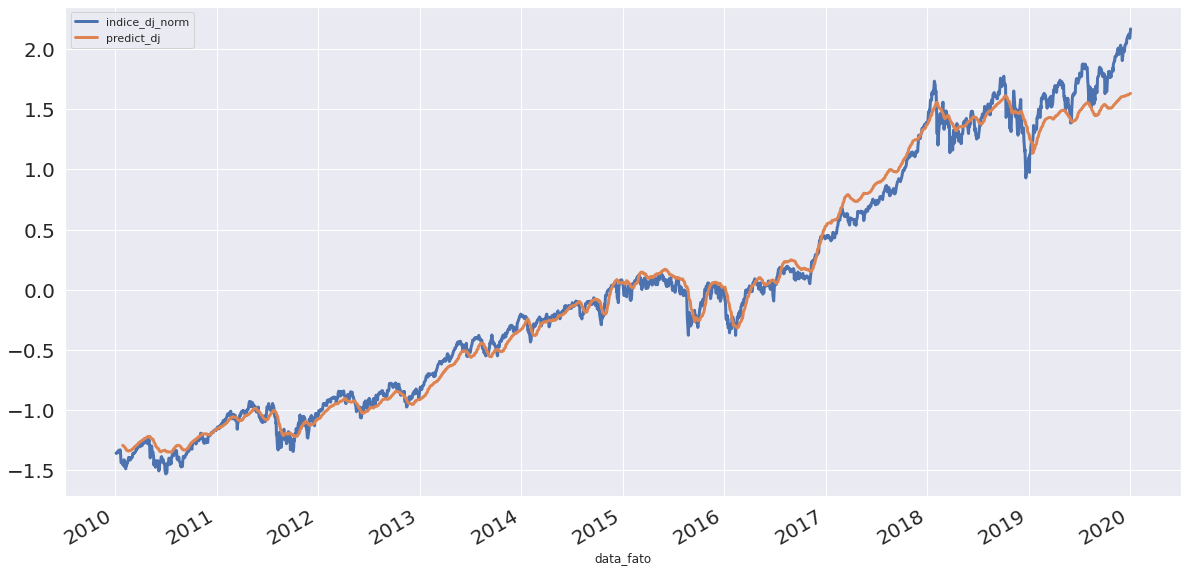

In [24]:
dataset_2.set_index('data_fato').plot(y=["indice_dj_norm", "predict_dj"] ,fontsize=20,linewidth=3)